<a href="https://colab.research.google.com/github/monalasma/Python_individual_first/blob/main/17_08_Scikit_learning_lib_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
advertising = pd.read_csv('/content/tvmarketing.csv')
advertising.head() #first 5

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe() #

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

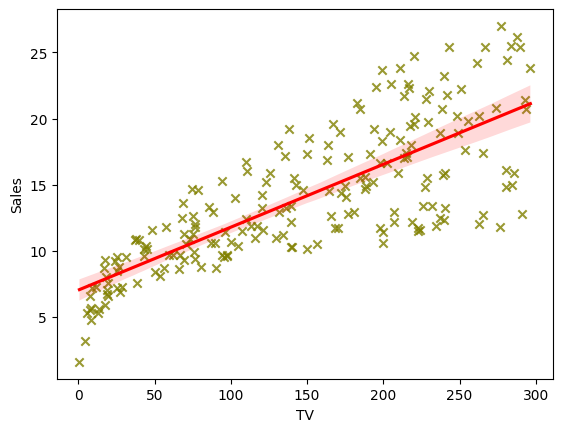

In [8]:
sns.regplot(x='TV',y='Sales',ci = 99, marker ='x', color ='olive', data=advertising, line_kws=dict(color='red'))

In [10]:
#calculate pearson correlation coefficient

advertising.corr() #calculate corr for the whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [12]:
advertising['TV'].corr(advertising['Sales'])


0.7822244248616061

### SUPERVISED VS UNSUPERVISED


###SCIKIT-LEARNING LIBRARY - LINEAR REGRESSION

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
#SCIKIT-LEARNING LIBRARY - LINEAR REGRESSION
#Data preparation for the model building(X/Y)
x = advertising.drop('Sales', axis = 1)
x.head()
y = advertising.drop('TV', axis = 1)
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


###
![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

In [23]:
#Split dataframe into traine and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42)
x_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


### Train the model

In [26]:
#column - feature
#row - observation
from sklearn.linear_model import LinearRegression
model = LinearRegression() #intilize the model
model.fit(x_train, y_train) #fit the model - on our data

LinearRegression()

In [29]:
### y= mx + b ###
print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


### a prediction

In [34]:
my_new_budget = [[150]] #for two-dimensional (x,y) need to use double square brackets
my_predicted_sales = model.predict(my_new_budget)
print(f'When the new budget is: {my_new_budget[0][0]}. Predicted sales is: {round(my_predicted_sales[0][0])}')

When the new budget is: 150. Predicted sales is: 14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
x_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [37]:
y_pred = model.predict(x_test)
final_df = pd.DataFrame()
final_df['TV'] = x_test
final_df['Actual_Sales'] = y_test
final_df['Predicted_sales'] = y_pred

,TV,Actual_Sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [43]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_Sales']-final_df['Predicted_sales'])
final_df.head()

,TV,Actual_Sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901
